<a href="https://colab.research.google.com/github/JL-plusUltra/DataScience/blob/main/Cluster_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/W_store.csv')
#data = data.iloc[:,2:]

In [ ]:
data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
######################## Convert Type into a class (just in case its needed) #################
def cat(x):
    if x=='A':
        return 1
    if x=='B':
        return 2
    if x=='C':
        return 3
data['classes'] = data['Type'].apply(lambda x: cat(x))

In [ ]:
####################### Normalize Size data #######################
data['Size']= data['Size']/data['Size'].max()

In [ ]:
data.head()

,Store,Type,Size,classes
0,1,A,0.688979,1
1,2,A,0.921160,1
2,3,B,0.170256,2
3,4,A,0.937351,1
4,5,B,0.158796,2


In [ ]:
data.isnull().sum()

Store      0
Type       0
Size       0
classes    0
dtype: int64

In [ ]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler


In [ ]:
###################### Data for clustering ####################3
Clus_Data = data[['Size']]
Clus_Data = np.nan_to_num(Clus_Data)
Clus_Data= StandardScaler().fit_transform(Clus_Data)


In [ ]:
db = DBSCAN(eps=0.15, min_samples=10,).fit(Clus_Data)


In [ ]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
data["Clus_Db"]=labels

In [ ]:
realClusterNum=len(set(labels))-(1 if -1 in labels else 0)
clusterNum = len(set(labels))

In [ ]:
data['Clus_Db'].value_counts()

-1    22
 0    13
 1    10
Name: Clus_Db, dtype: int64

In [ ]:
data[["Store", "Type","Size","Clus_Db"]].head(5)

,Store,Type,Size,Clus_Db
0,1,A,0.688979,-1
1,2,A,0.921160,0
2,3,B,0.170256,1
3,4,A,0.937351,0
4,5,B,0.158796,1


In [ ]:
############### This produces way less -1 values #################

from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = data[['Size']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
data["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
data[["Store", "Type","Size","Clus_Db"]].head(5)

,Store,Type,Size,Clus_Db
0,1,A,0.688979,2
1,2,A,0.921160,0
2,3,B,0.170256,1
3,4,A,0.937351,0
4,5,B,0.158796,1


In [ ]:
data['Clus_Db'].value_counts()

 2    17
 0    15
 1    12
-1     1
Name: Clus_Db, dtype: int64

In [ ]:
X=data[['Size']].copy()

In [ ]:
X = X.to_numpy()

In [ ]:
def KMeans(x,k,iterations=3):
  indices= np.arange(x.shape[0])
  sample_indices=np.random.choice(indices,size=k,replace=False)
  means=x[sample_indices]

  for i in range(iterations):
    dist=Distance(x,means)
    y_hat=np.argmin(dist,axis=1)
    means=[]
    for n in range(k):
      mean=np.mean(x[y_hat==n],axis=0)
      means.append(mean)
    means=np.vstack(means)

  dist=Distance(x,means)
  y_hat=np.argmin(dist,axis=1)
  return (y_hat,means)

In [ ]:
def Distance(x, means, *args, **kwargs):
  diff = []
  dists = []
  for mean in means:
     diff=x-mean
     dist = np.sqrt(np.sum(diff**2, axis=1, keepdims=True))
     dists.append(dist)
  return np.hstack(dists)

In [ ]:
y_hat, means=KMeans(X, 3, iterations=5)

In [ ]:
clusters = pd.DataFrame(y_hat, columns = ['Clusters'])

In [ ]:
X=data[['Size','classes']].copy()

In [ ]:
X['clusters']=clusters

In [ ]:
X['clusters'].value_counts()

2    18
1    15
0    12
Name: clusters, dtype: int64

In [ ]:
X.head(5)

,Size,classes,clusters
0,0.688979,1,2
1,0.921160,1,1
2,0.170256,2,0
3,0.937351,1,1
4,0.158796,2,0


In [ ]:
X=X.to_numpy()

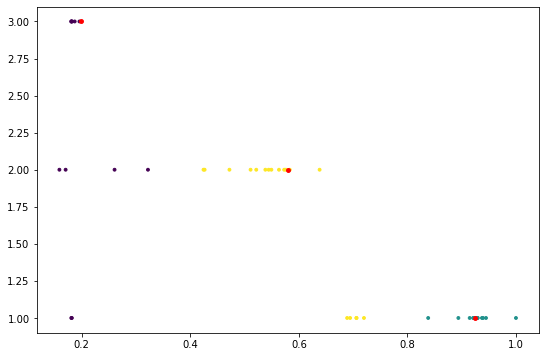

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(X[:,0], X[:,1], s=8, c=y_hat)
plt.scatter(means[:,0],[[3,1,2]], c='r', s=15)

In [ ]:
############### KMEANS Clustering Output ######################
(y_hat)

array([2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0,
       2])

In [ ]:
################# DB scan Clustering Output######## ...Patterns are very close if in y_hat 1=2 2=0 and 0=1....
(labels)

array([ 2,  0,  1,  0,  1,  0,  1,  2,  2,  2,  0,  2,  0,  0,  2,  1, -1,
        2,  0,  0,  2,  2,  2,  0,  2,  2,  0,  0,  2,  1,  0,  0,  1,  2,
        2,  1,  1,  1,  0,  2,  0,  1,  1,  1,  2])

In [ ]:
###### Mean values of clusters ###############
means

array([[0.19845727],
       [0.92514927],
       [0.57982655]])

In [ ]:
import scipy.cluster.hierarchy as shc

In [ ]:
plt.figure(figsize=(12,14))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(df_1[['Size_norm']], method='ward'))
plt.axhline(y=7, color='r', linestyle='--')

In [ ]:
data.loc[lambda data: data['Clus_Db'] == -1]

,Store,Type,Size,classes,Clus_Db
16,17,B,0.424311,2,-1


In [ ]:
data.loc[lambda data: data['Clus_Db'] == 0]

,Store,Type,Size,classes,Clus_Db
1,2,A,0.921160,1,0
3,4,A,0.937351,1,0
5,6,A,0.922062,1,0
10,11,A,0.944801,1,0
12,13,A,1.000000,1,0
13,14,A,0.914744,1,0
18,19,A,0.928045,1,0
19,20,A,0.927694,1,0
23,24,A,0.928045,1,0
26,27,A,0.929706,1,0


In [ ]:
s1=data.loc[lambda data: data['Clus_Db'] == 0]

In [ ]:
s1['Store'].to_numpy()

array([ 2,  4,  6, 11, 13, 14, 19, 20, 24, 27, 28, 31, 32, 39, 41])

In [ ]:
data.loc[lambda data: data['Clus_Db'] == 1]

,Store,Type,Size,classes,Clus_Db
2,3,B,0.170256,2,1
4,5,B,0.158796,2,1
6,7,B,0.321976,2,1
15,16,B,0.260434,2,1
29,30,C,0.195736,3,1
32,33,A,0.180720,1,1
35,36,A,0.181721,1,1
36,37,C,0.181721,3,1
37,38,C,0.180720,3,1
41,42,C,0.180720,3,1


In [ ]:
s2 = data.loc[lambda data: data['Clus_Db'] == 1]

In [ ]:
s2['Store'].to_numpy()

array([ 3,  5,  7, 16, 30, 33, 36, 37, 38, 42, 43, 44])

In [ ]:
data.loc[lambda data: data['Clus_Db'] == 2]

,Store,Type,Size,classes,Clus_Db
0,1,A,0.688979,1,2
7,8,A,0.706113,1,2
8,9,B,0.572953,2,2
9,10,B,0.576044,2,2
11,12,B,0.511051,2,2
14,15,B,0.563409,2,2
17,18,B,0.549367,2,2
20,21,B,0.638219,2,2
21,22,B,0.544376,2,2
22,23,B,0.521501,2,2


In [ ]:
s3=data.loc[lambda data: data['Clus_Db'] == 2]

In [ ]:
s3['Store'].to_numpy()

array([ 1,  8,  9, 10, 12, 15, 18, 21, 22, 23, 25, 26, 29, 34, 35, 40, 45])